In [1]:
import numpy as np

In [4]:
np.hamming(5)

array([0.08, 0.54, 1.  , 0.54, 0.08])

In [5]:
np.hamming(512)

array([0.08      , 0.08003477, 0.08013909, 0.08031292, 0.08055626,
       0.08086906, 0.08125127, 0.08170284, 0.0822237 , 0.08281376,
       0.08347295, 0.08420116, 0.08499828, 0.08586418, 0.08679875,
       0.08780184, 0.08887329, 0.09001294, 0.09122063, 0.09249617,
       0.09383936, 0.09525001, 0.09672789, 0.0982728 , 0.09988448,
       0.10156271, 0.10330722, 0.10511775, 0.10699403, 0.10893578,
       0.1109427 , 0.11301448, 0.11515082, 0.11735139, 0.11961586,
       0.12194389, 0.12433512, 0.12678919, 0.12930573, 0.13188437,
       0.13452471, 0.13722635, 0.13998888, 0.14281189, 0.14569495,
       0.14863762, 0.15163946, 0.15470002, 0.15781883, 0.16099542,
       0.16422931, 0.16752001, 0.17086702, 0.17426984, 0.17772796,
       0.18124085, 0.18480797, 0.1884288 , 0.19210278, 0.19582935,
       0.19960796, 0.20343803, 0.20731899, 0.21125024, 0.2152312 ,
       0.21926125, 0.2233398 , 0.22746622, 0.2316399 , 0.23586019,
       0.24012646, 0.24443807, 0.24879437, 0.25319469, 0.25763

In [6]:
import matplotlib.pyplot as plt

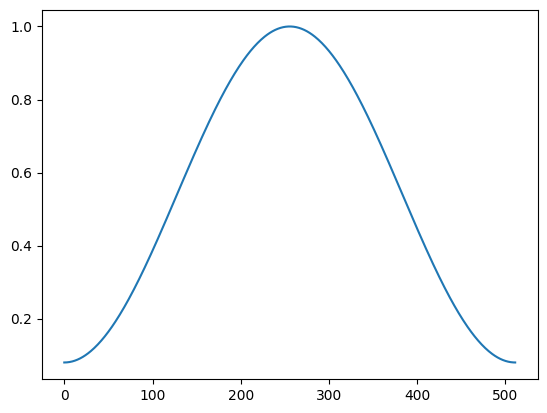

In [7]:
plt.plot(np.hamming(512))

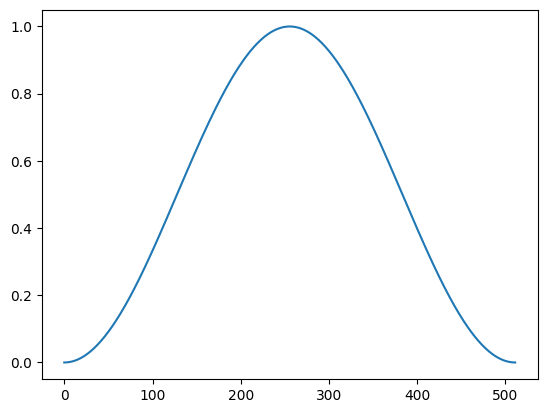

In [9]:
plt.plot(np.hanning(512))

In [14]:
length = 512
x = np.linspace(-4, 4, length)

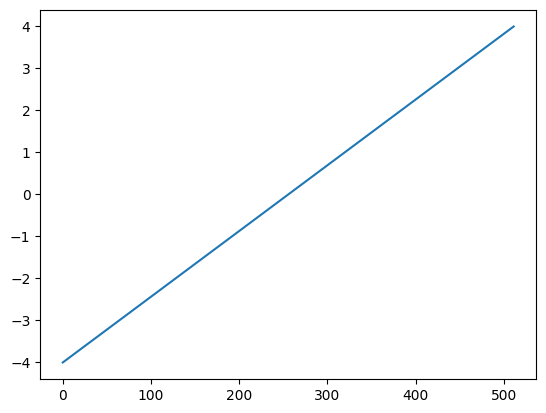

In [15]:
plt.plot(x)

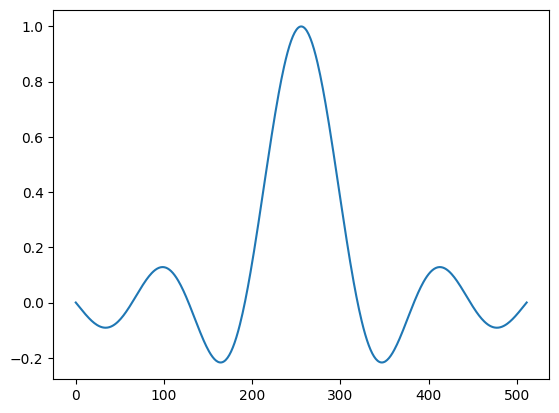

In [16]:
sinc_x = np.sinc(x)
plt.plot(sinc_x)

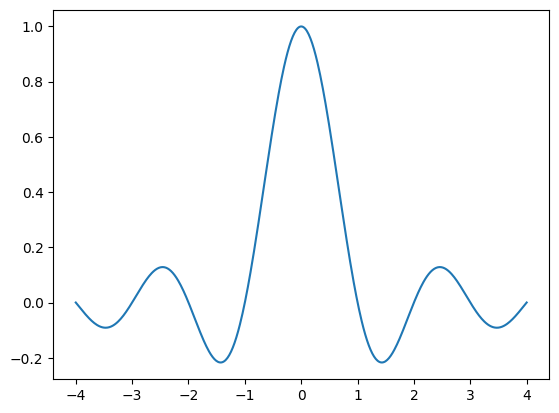

In [17]:
plt.plot(x, sinc_x)

In [19]:
f1 = 100 #Hz
f2 = 120
# g[n, f1, f2] = 2f2sinc(2πf2n) − 2f1sinc(2πf1n)

In [18]:
g = lambda n, f1, f2: 2*f2*np.sinc(2*np.pi*f2*n) - 2*f1*np.sinc(2*np.pi*f1*n)

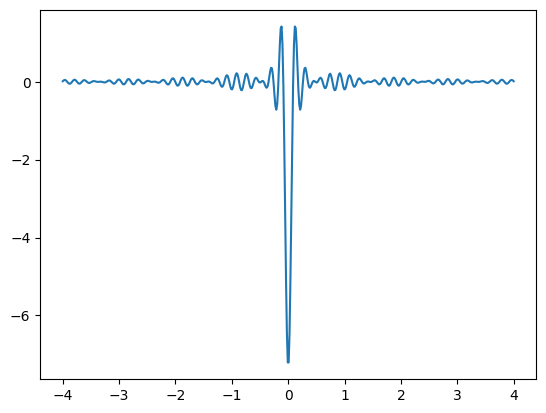

In [20]:
gx = [g(i, f1, f2) for i in x]
plt.plot(x, gx)

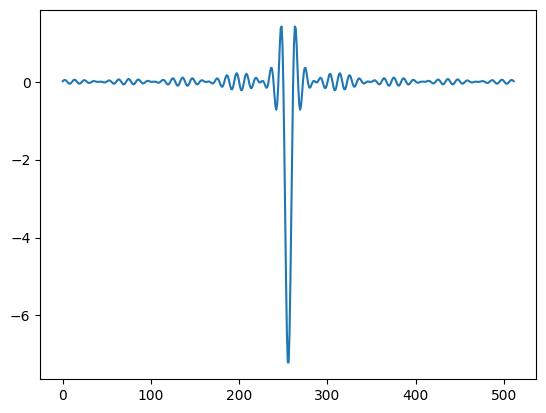

In [21]:
plt.plot(gx)

In [28]:
whann = np.hanning(length)

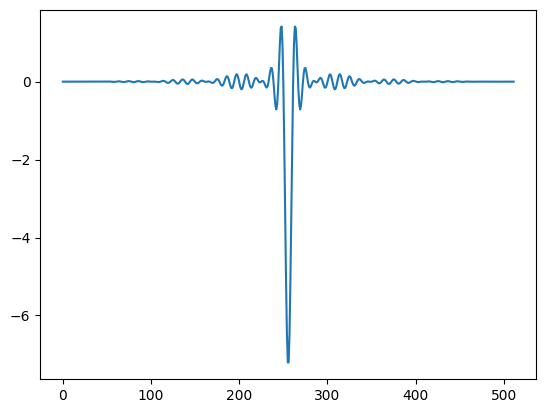

In [29]:
plt.plot(whann*gx)

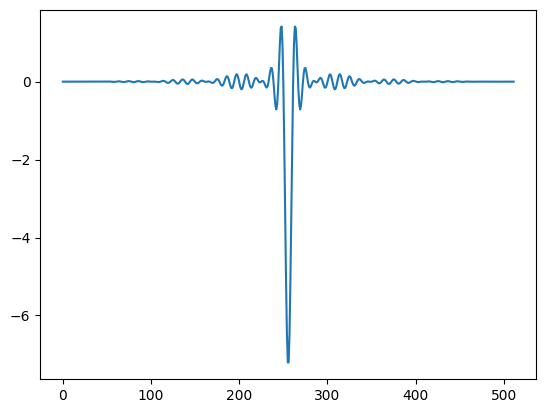

In [30]:
whamming = np.hanning(length)
plt.plot(whamming*gx)

In [40]:
w = lambda n, arr: np.sum([(-1)**k*a*np.cos(2*np.pi*k*np.arange(1-n, n, 2)/(n-1)) for k,a in enumerate(arr)], axis=0) 

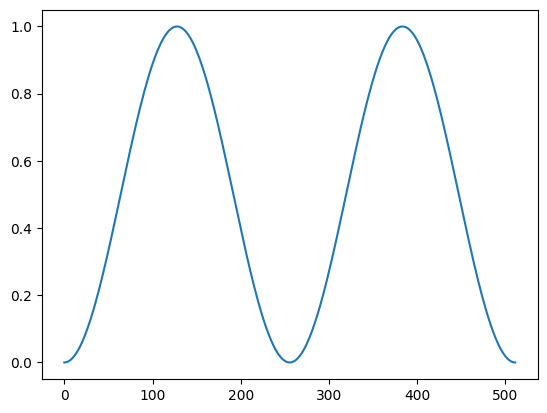

In [41]:
plt.plot(w(512, [0.5,0.5]))

In [593]:
# https://github.com/numpy/numpy/blob/v1.26.0/numpy/lib/function_base.py#L3238
def win(n, arr):
    b = np.arange(1-n, n, 2)
    c = [(-1)**k*a*np.cos(2*np.pi*k*b/(n-1)) for k,a in enumerate(arr)]
    return np.sum(c, axis=0), b, c 

# https://github.com/pytorch/pytorch/blob/main/torch/signal/windows/windows.py#L643
def win2(n, arr):
    constant = 2*np.pi / (n-1)
    k = np.linspace(0, (n-1)*constant, n)
    a_i = np.array([(-1) ** i * w for i, w in enumerate(arr)])
    i = np.arange(a_i.shape[0])
    return (np.expand_dims(a_i, axis=-1) * np.cos(np.expand_dims(i, axis=-1) * k)).sum(0)

# https://github.com/pytorch/pytorch/blob/main/torch/signal/windows/windows.py#L643
def win3(n, arr):
    constant = 2*torch.pi / (n-1)
    k = torch.linspace(0, 2*torch.pi, n)
    a_i = torch.tensor([(-1) ** i * w for i, w in enumerate(arr)])
    i = torch.arange(a_i.shape[0])
    win = (a_i[:,None] * torch.cos(i[:,None] * k)).sum(0)
    return win

In [ ]:
a_i = [0.5,-0.3,0.2]
i = torch.arange(a_i.shape[0])
k = torch.linspace(0, 2*torch.pi, n)
a_i

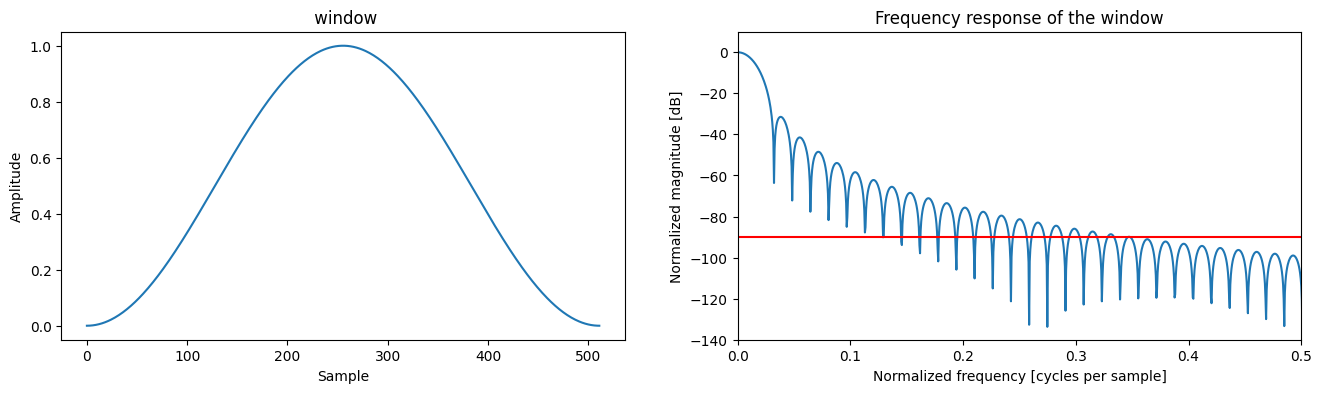

In [591]:
wc = win2(length, [0.5,0.5])
visualize_window(wc)

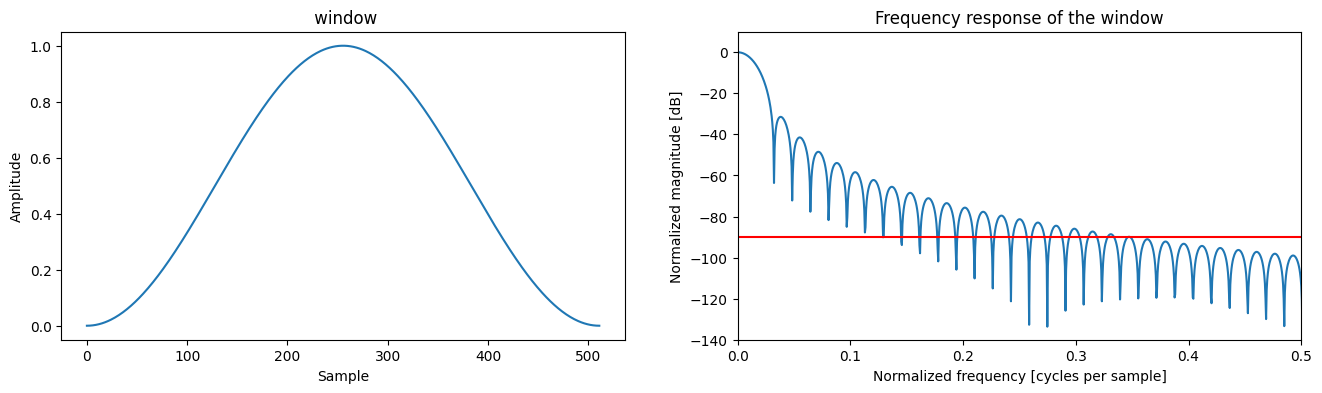

In [594]:
wc = win3(length, [0.5,0.5])
visualize_window(wc)

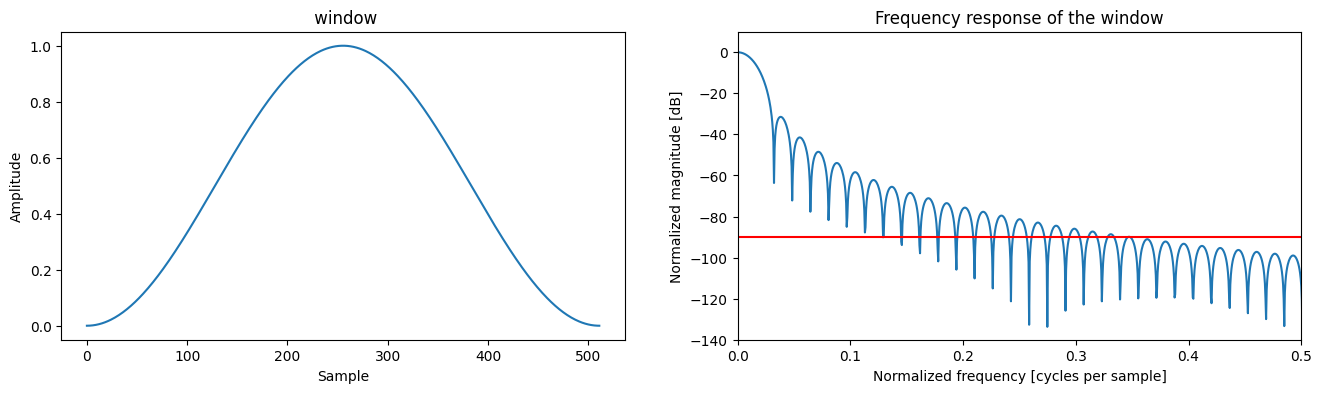

In [592]:
visualize_window(np.hanning(length))

512


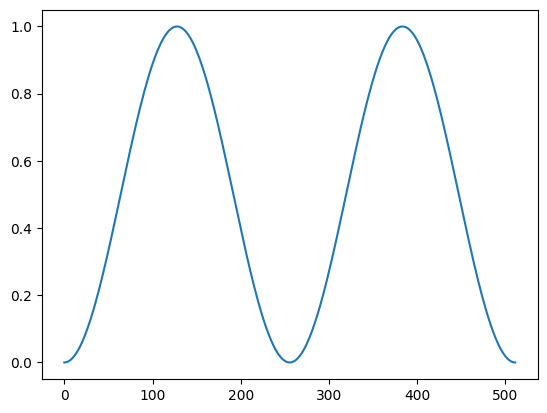

In [73]:
wc, b, c = win(length, [0.5,0.5])
print(len(wc))
plt.plot(wc)

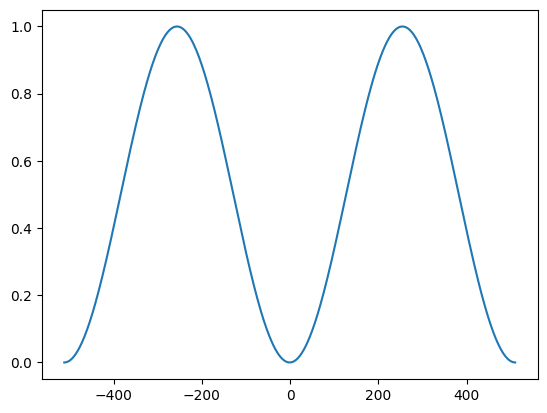

In [113]:
plt.plot(np.fft.fftshift(np.fft.fftfreq(length, d=1/length/2)), wc.real)

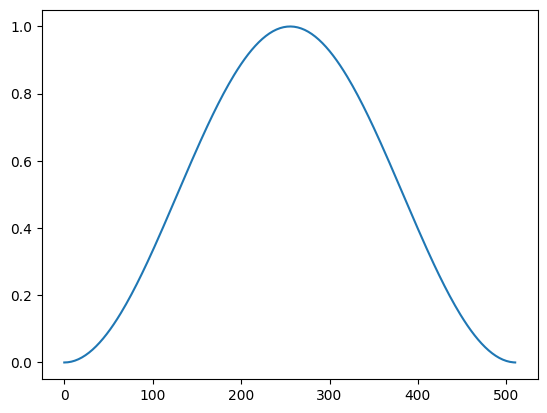

In [115]:
plt.plot(np.fft.fftfreq(length, d=1/length/2)[:length//2], wc.real[:length//2])

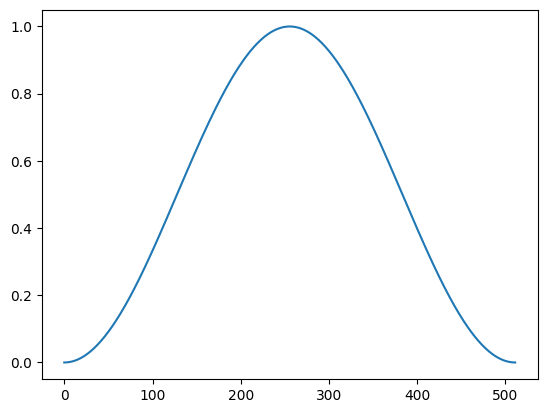

In [119]:
plt.plot(np.hanning(512))

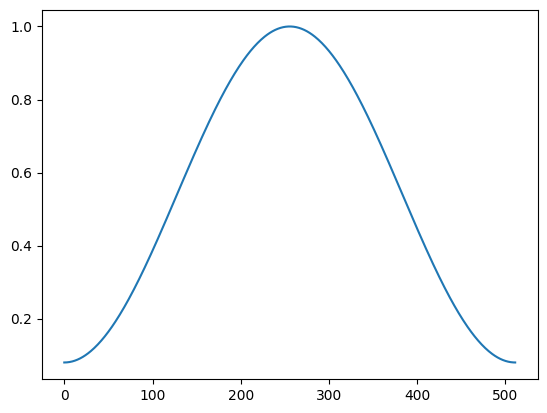

In [124]:
# M = float(length)
M = length
n = np.arange(1-M, M, 2)
wn = 0.54 + 0.46*np.cos(np.pi*n/(M-1))
plt.plot(wn)

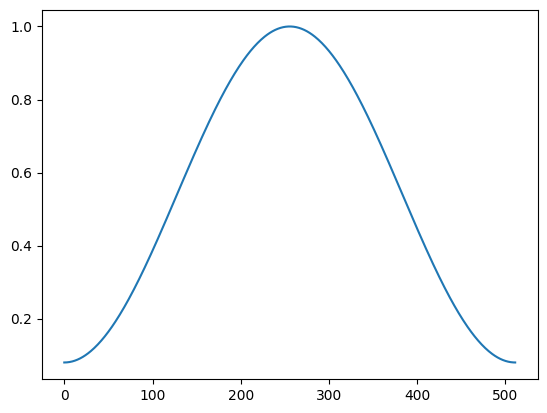

In [574]:
# M = float(length)
M = length
n = np.arange(1-M, M, 2) / (M-1)
wn = 0.54 + 0.46*np.cos(np.pi*n)
plt.plot(wn)

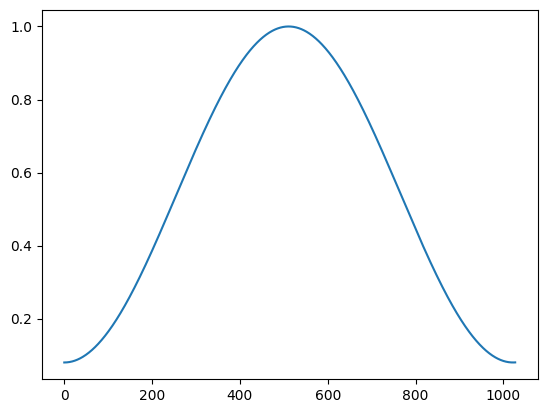

In [585]:
plt.plot(0.54 + 0.46*np.cos(np.pi*np.arange(-1, 1.01, 1/(M-1))))

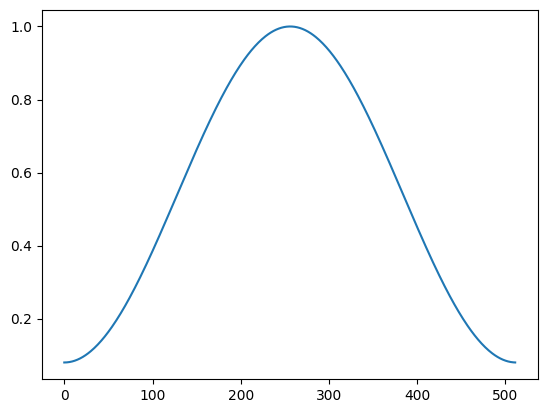

In [589]:
plt.plot(0.54 + 0.46*np.cos(np.pi*np.fft.fftshift(np.fft.fftfreq(M,1))*2))

512


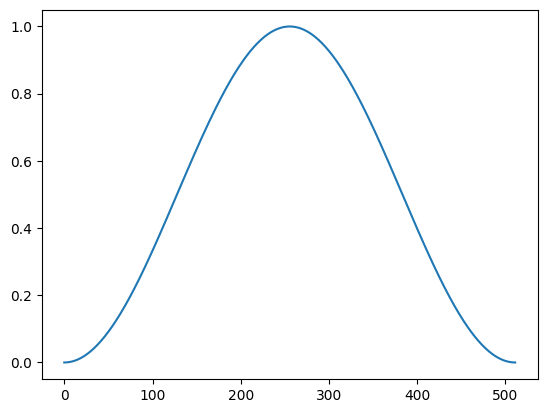

In [76]:
wc2 = win2(length, [0.5,0.5])
print(len(wc2))
plt.plot(wc2)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.general_cosine.html

In [125]:
from scipy.signal.windows import general_cosine
from scipy.fft import fft, fftshift

Text(0.5, 0, 'Sample')

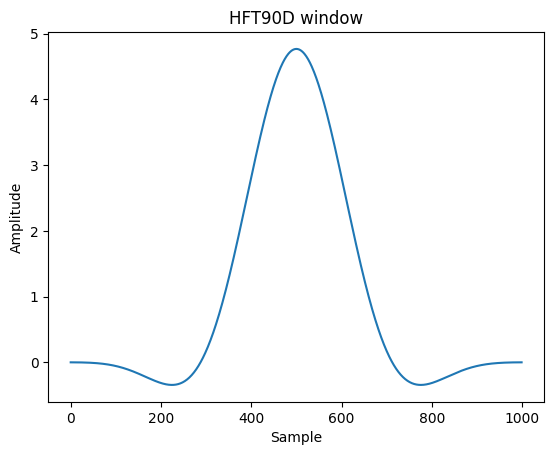

In [127]:
HFT90D = [1, 1.942604, 1.340318, 0.440811, 0.043097]
window = general_cosine(1000, HFT90D, sym=False)
plt.plot(window)
plt.title("HFT90D window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

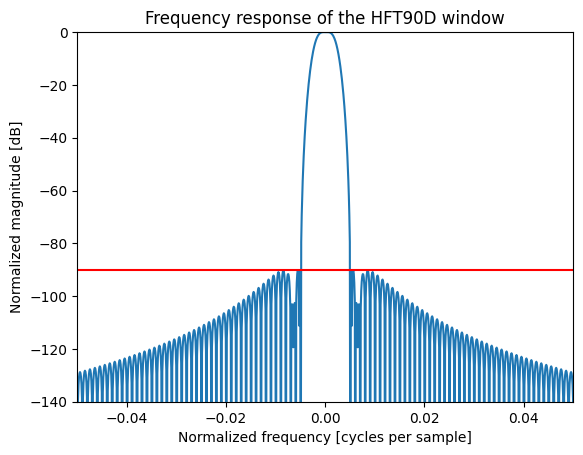

In [128]:
plt.figure()
A = fft(window, 10000) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = np.abs(fftshift(A / abs(A).max()))
response = 20 * np.log10(np.maximum(response, 1e-10))
plt.plot(freq, response)
plt.axis([-50/1000, 50/1000, -140, 0])
plt.title("Frequency response of the HFT90D window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axhline(-90.2, color='red')
plt.show()

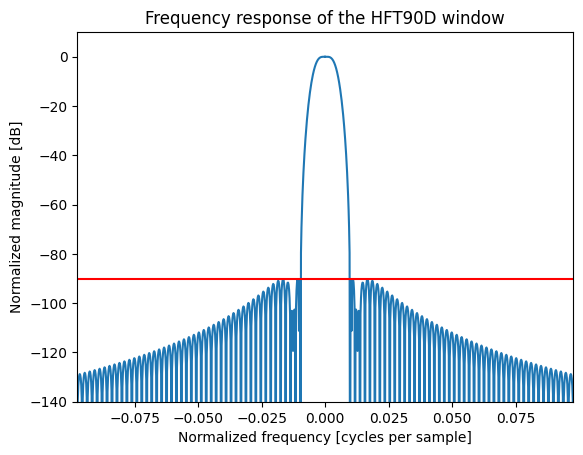

In [184]:
HFT90D = [1, 1.942604, 1.340318, 0.440811, 0.043097]
window = general_cosine(length, HFT90D, sym=False)
A = np.fft.fft(window, length*10)/length
freq = np.fft.fftfreq(len(A),d=1/length)/length
response = np.abs(A / np.abs(A).max())
response = 20 * np.log10(np.maximum(response, 1e-10)) # to dB
plt.axis([-50/length, 50/length, -140, 10])
plt.plot(freq, response)
plt.title("Frequency response of the HFT90D window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axhline(-90.2, color='red')
plt.show()

In [526]:
def visualize_window(window, window_name="", f_xlim=None, f_ylim=None, f_xhighlight=-90.2, sr=16000):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    axes[0].plot(window)
    axes[0].set_title(f"{window_name} window")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_xlabel("Sample")

    length = len(window)
    n_cycles = sr//length
    A = np.fft.fft(window, length*n_cycles)/ (length/2) 
    freq = np.fft.fftfreq(len(A),d=n_cycles/length*2) 
    response = np.abs(A / np.abs(A).max())
    response = 20 * np.log10(np.maximum(response, 1e-10)) # to dB
    if not f_xlim:
        f_xlim = [0,0.5]
    if not f_ylim:
        f_ylim = [-140, 10]
    axes[1].set_xlim(f_xlim)
    axes[1].set_ylim(f_ylim)
    axes[1].plot(freq, response)
    axes[1].set_title("Frequency response of the window")
    axes[1].set_ylabel("Normalized magnitude [dB]")
    axes[1].set_xlabel("Normalized frequency [cycles per sample]")
    axes[1].axhline(f_xhighlight, color='red')
    

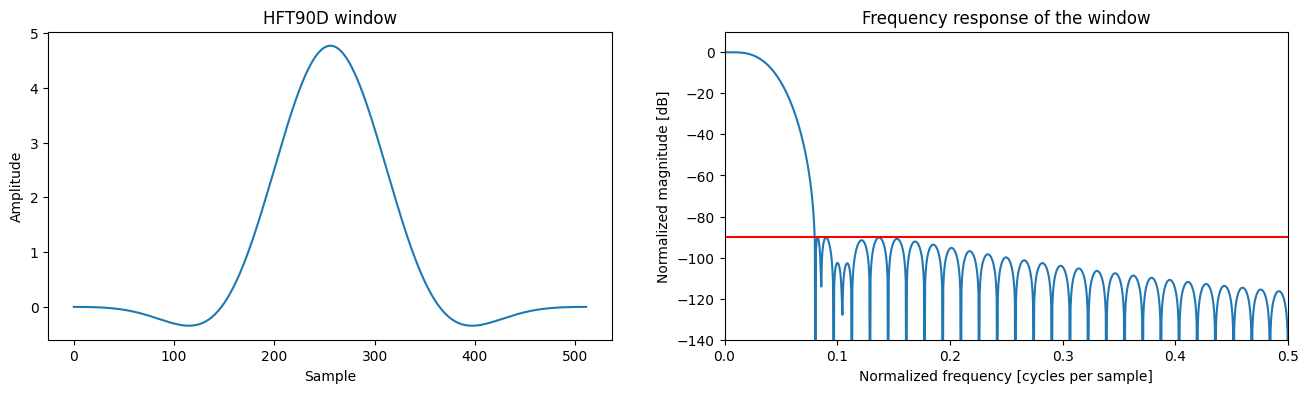

In [527]:
visualize_window(general_cosine(length, 
                        [1, 1.942604, 1.340318, 0.440811, 0.043097], sym=False), 
                        'HFT90D', sr=16000)

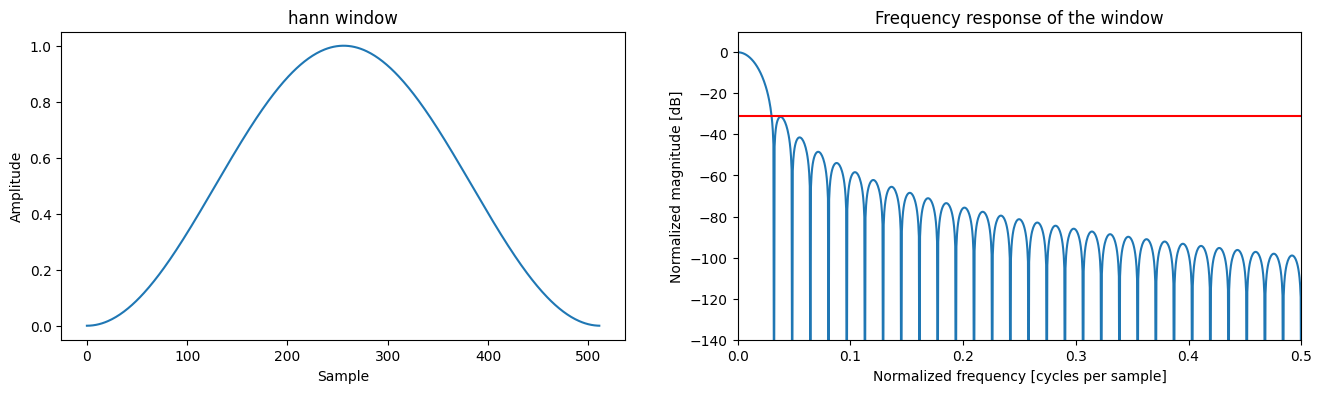

In [528]:
visualize_window(general_cosine(length, 
                        [0.5,0.5], sym=False),
                        'hann', f_xhighlight=-31)

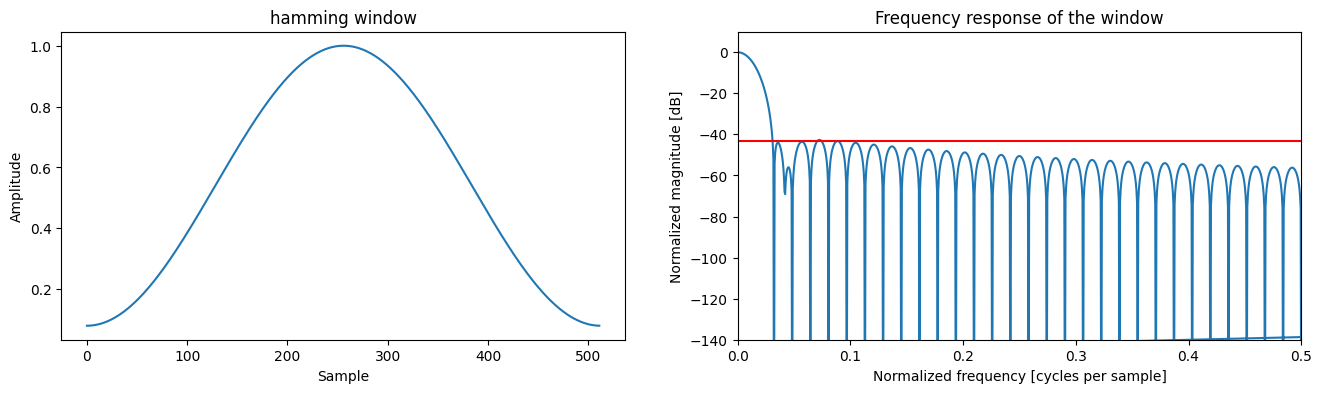

In [541]:
visualize_window(general_cosine(length, 
                        [0.54,0.46], sym=False),
                        'hamming', f_xhighlight=-43)

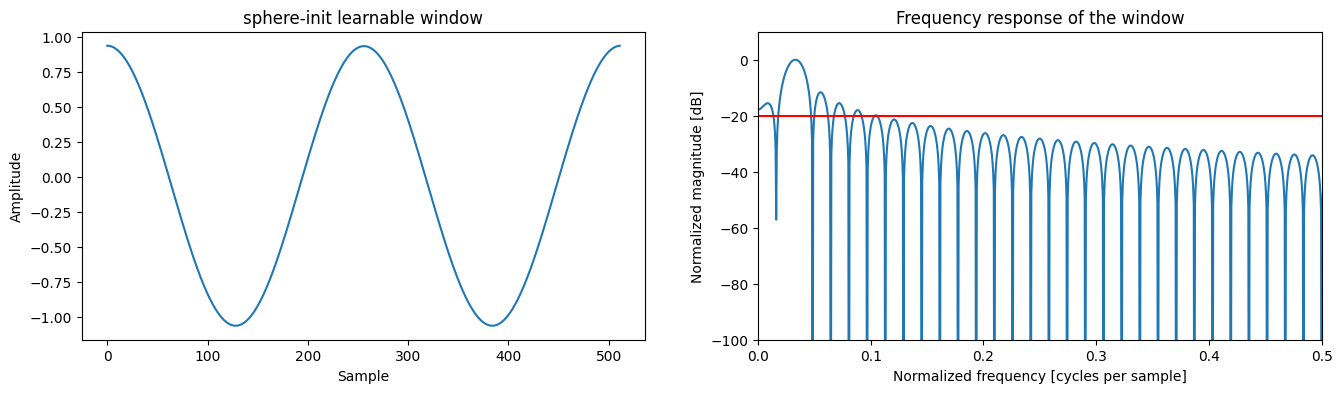

In [553]:
visualize_window(general_cosine(length, 
                        [-0.0643, -0.0014,  0.9979], sym=False),
                        'sphere-init learnable', f_xhighlight=-20, f_ylim=[-100,10])

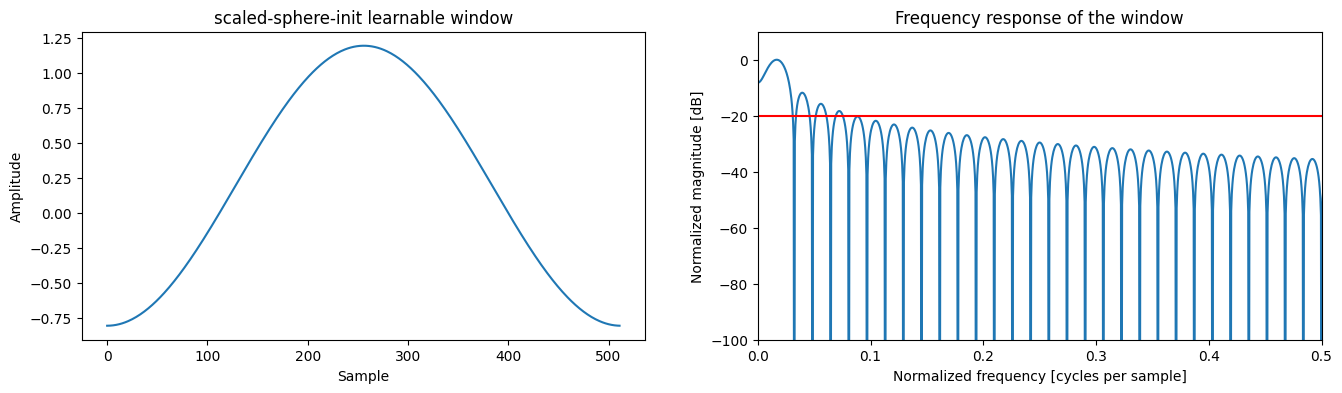

In [554]:
visualize_window(general_cosine(length, 
                        [0.1952, 1.0000, 0.0000], sym=False),
                        'scaled-sphere-init learnable', f_xhighlight=-20, f_ylim=[-100,10])

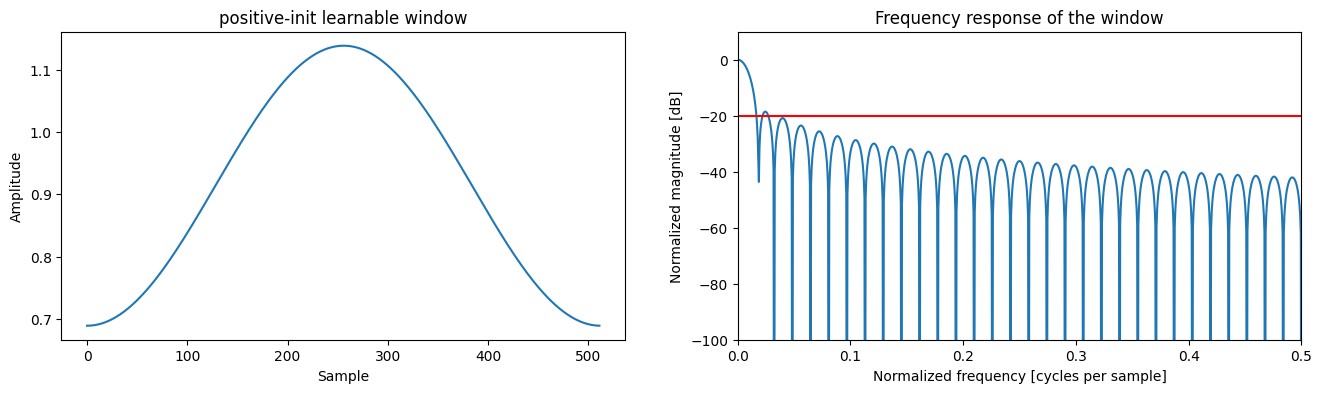

In [555]:
visualize_window(general_cosine(length, 
                        [0.9139, 0.2246], sym=False),
                        'positive-init learnable', f_xhighlight=-20, f_ylim=[-100,10])

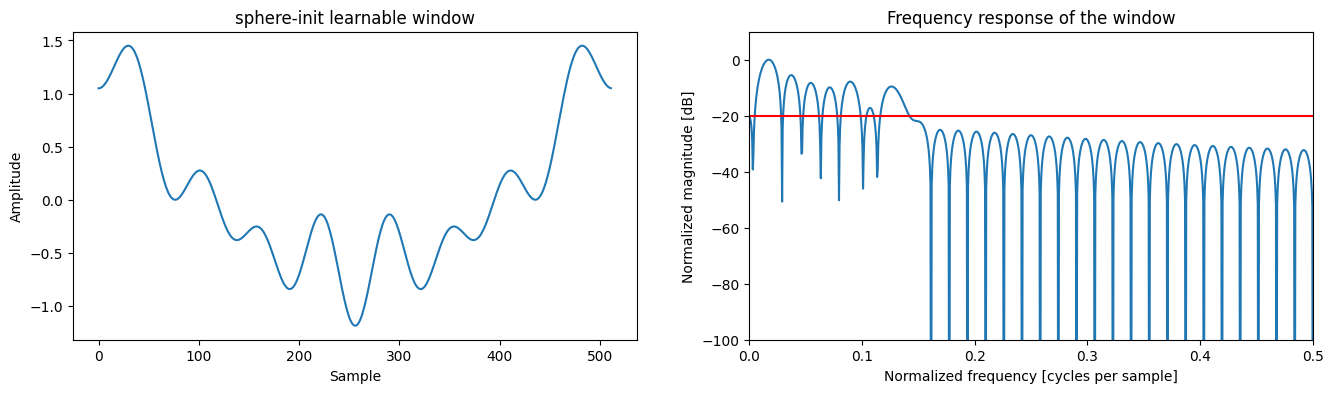

In [556]:
visualize_window(general_cosine(length, 
                        [ 0.0425, -0.8820,  0.2831, -0.1264,  0.0662, -0.0560, -0.1780,  0.0236,
        -0.2804, -0.0754], sym=False),
                        'sphere-init learnable', f_xhighlight=-20, f_ylim=[-100,10])

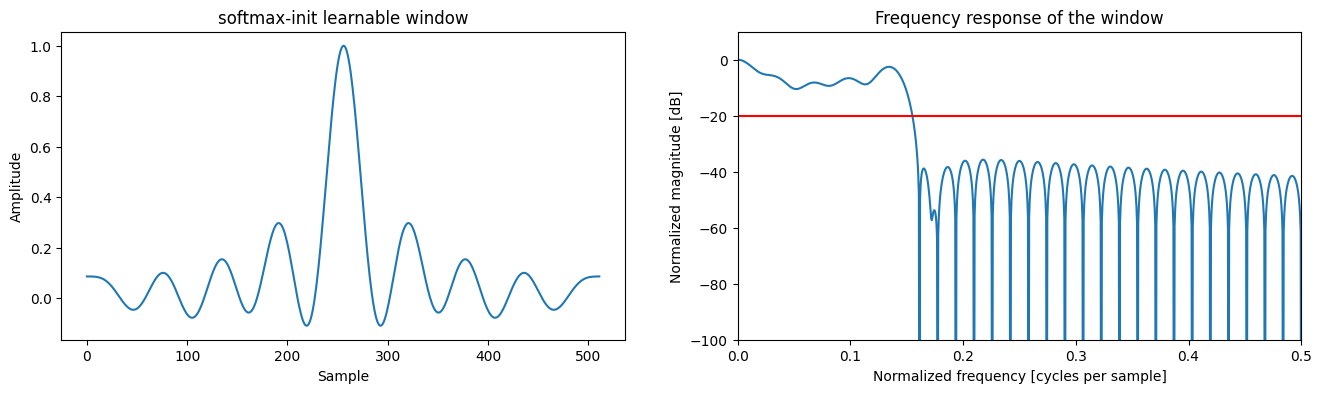

In [557]:
visualize_window(general_cosine(length, 
                        [0.1066, 0.1391, 0.1097, 0.0668, 0.0816, 0.0727, 0.0993, 0.0774, 0.1457,
        0.1012], sym=False),
                        'softmax-init learnable', f_xhighlight=-20, f_ylim=[-100,10])

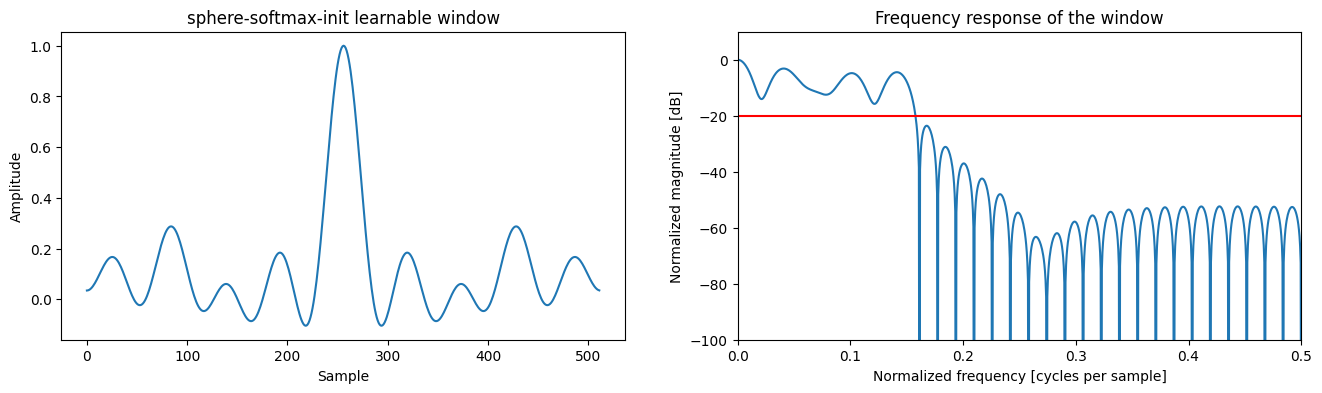

In [558]:
visualize_window(general_cosine(length, 
                        [0.1206, 0.0720, 0.1239, 0.1398, 0.0707, 0.0584, 0.1293, 0.0783, 0.0728,
        0.1342], sym=False),
                        'sphere-softmax-init learnable', f_xhighlight=-20, f_ylim=[-100,10])

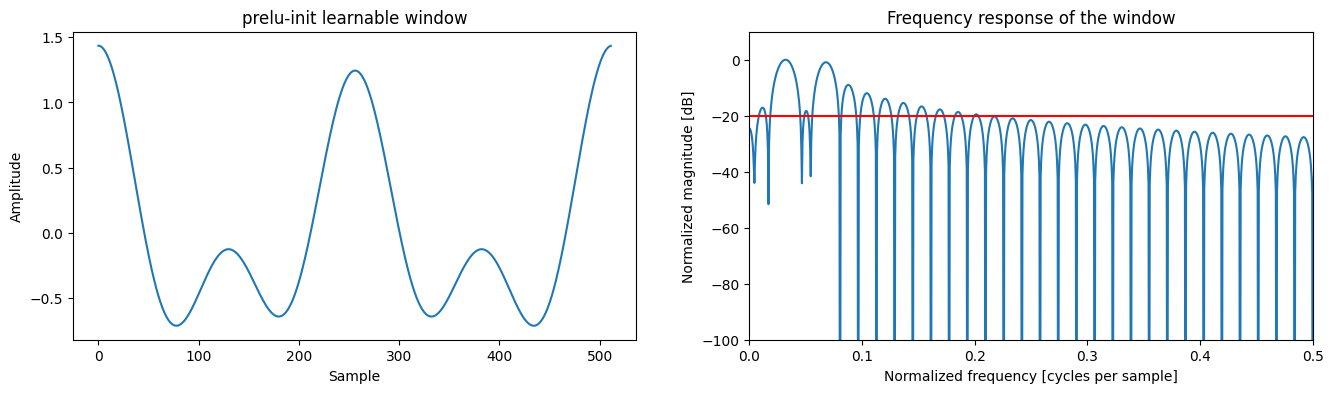

In [559]:
visualize_window(general_cosine(length, 
                       [ 0.0220, -0.0362,  0.7335, -0.0592,  0.5840], sym=False),
                        'prelu-init learnable', f_xhighlight=-20, f_ylim=[-100,10])

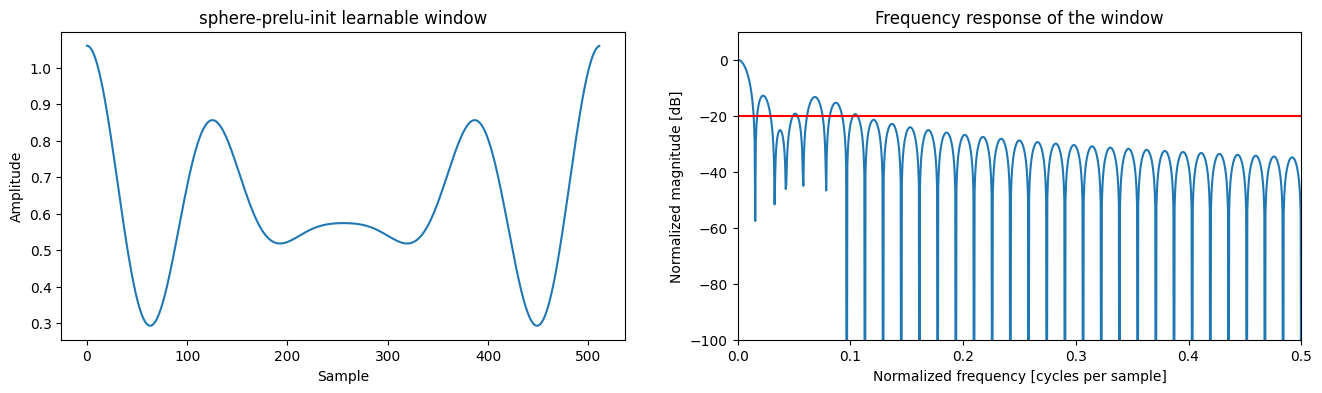

In [560]:
visualize_window(general_cosine(length, 
                        [ 0.6204, -0.0420, -0.0185, -0.1155,  0.2150, -0.0856], sym=False),
                        'sphere-prelu-init learnable', f_xhighlight=-20, f_ylim=[-100,10])

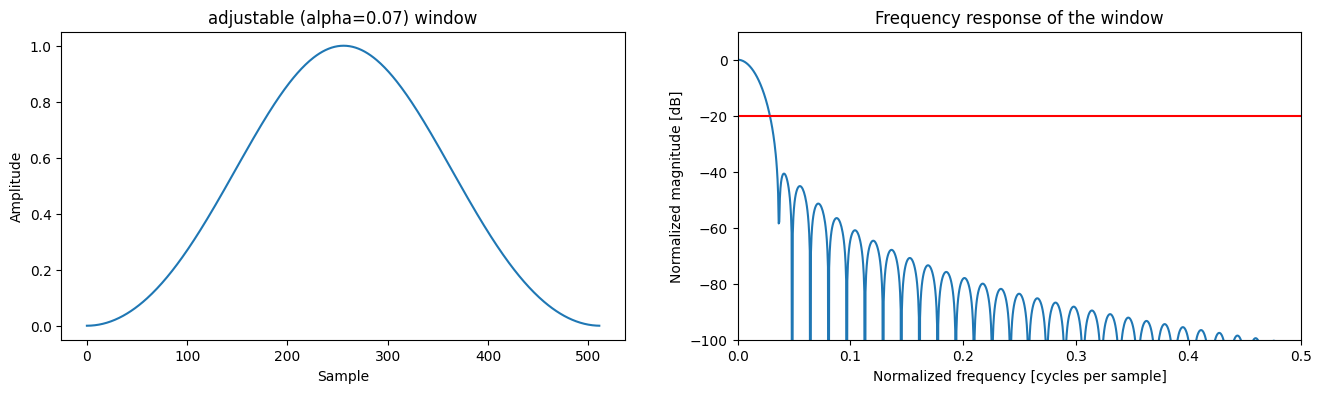

In [561]:
alpha = 0.07
visualize_window(general_cosine(length, 
                        [0.5-alpha/2, 0.5, alpha/2], sym=False),
                        f'adjustable (alpha={alpha:.2f})', f_xhighlight=-20, f_ylim=[-100,10])

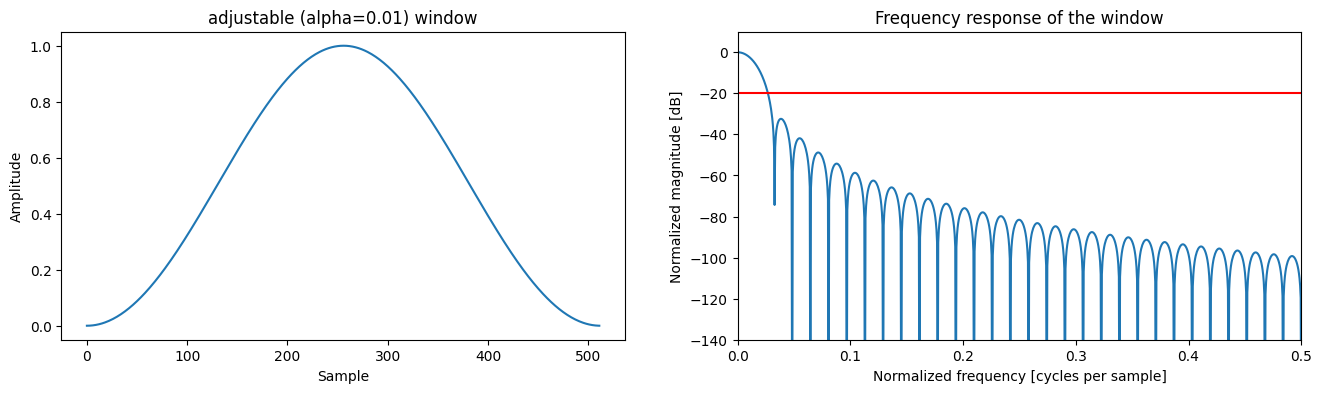

In [563]:
alpha = 0.01
visualize_window(general_cosine(length, 
                        [0.5-alpha/2, 0.5, alpha/2], sym=False),
                        f'adjustable (alpha={alpha:.2f})', f_xhighlight=-20)

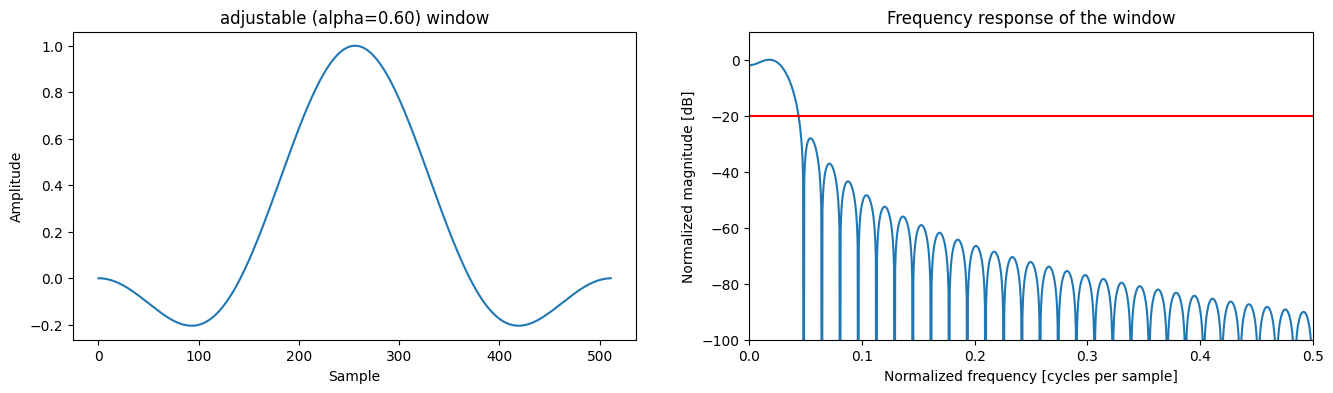

In [565]:
alpha = 0.6
visualize_window(general_cosine(length, 
                        [0.5-alpha/2, 0.5, alpha/2], sym=False),
                        f'adjustable (alpha={alpha:.2f})', f_xhighlight=-20, f_ylim=[-100,10])

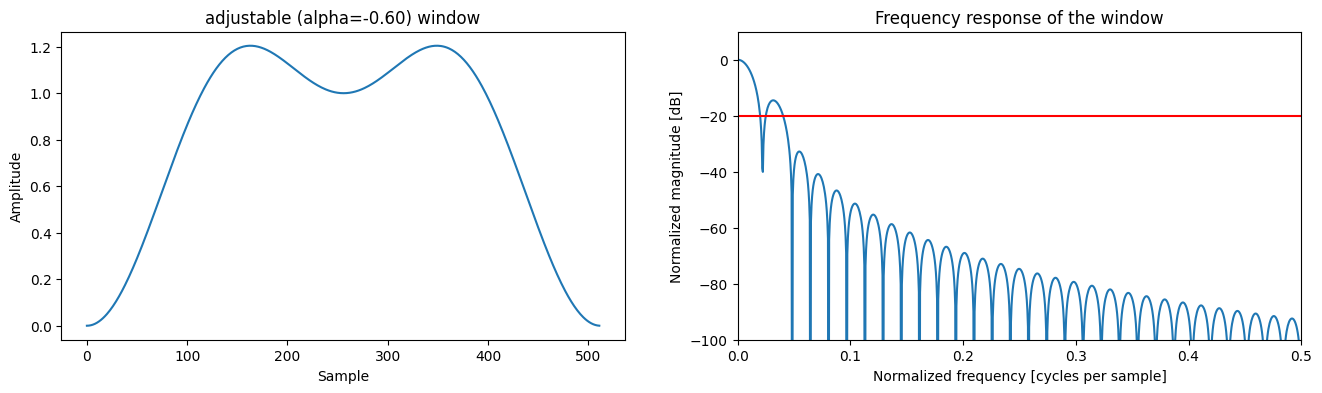

In [567]:
alpha = -0.6
visualize_window(general_cosine(length, 
                        [0.5-alpha/2, 0.5, alpha/2], sym=False),
                        f'adjustable (alpha={alpha:.2f})', f_xhighlight=-20, f_ylim=[-100,10])

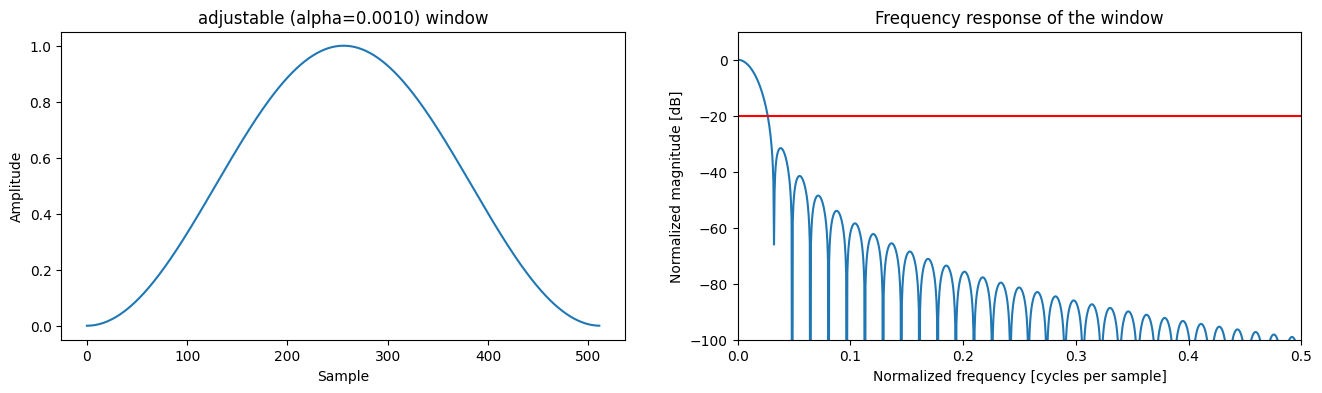

In [568]:
alpha = 0.001
visualize_window(general_cosine(length, 
                        [0.5-alpha/2, 0.5, alpha/2], sym=False),
                        f'adjustable (alpha={alpha:.4f})', f_xhighlight=-20, f_ylim=[-100,10])

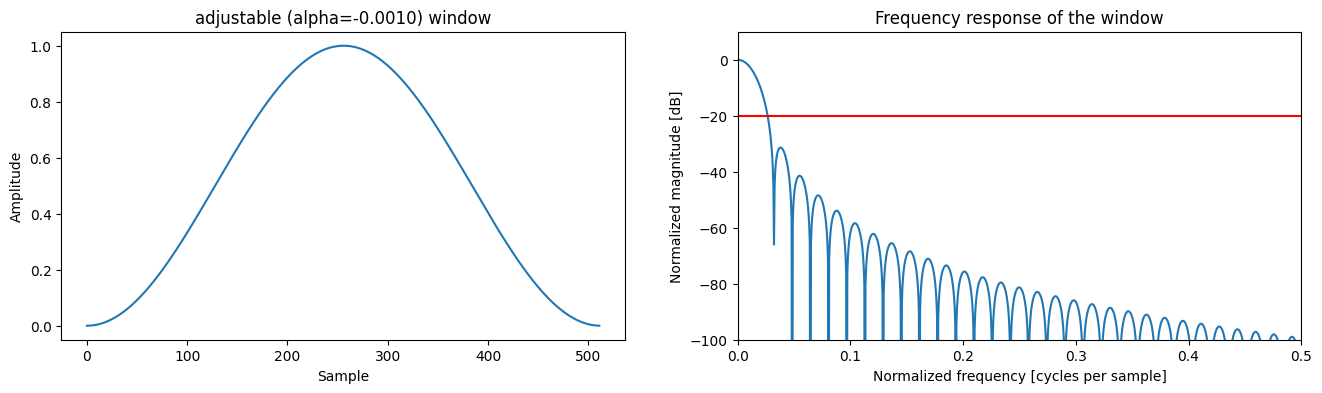

In [569]:
alpha = -0.001
visualize_window(general_cosine(length, 
                        [0.5-alpha/2, 0.5, alpha/2], sym=False),
                        f'adjustable (alpha={alpha:.4f})', f_xhighlight=-20, f_ylim=[-100,10])

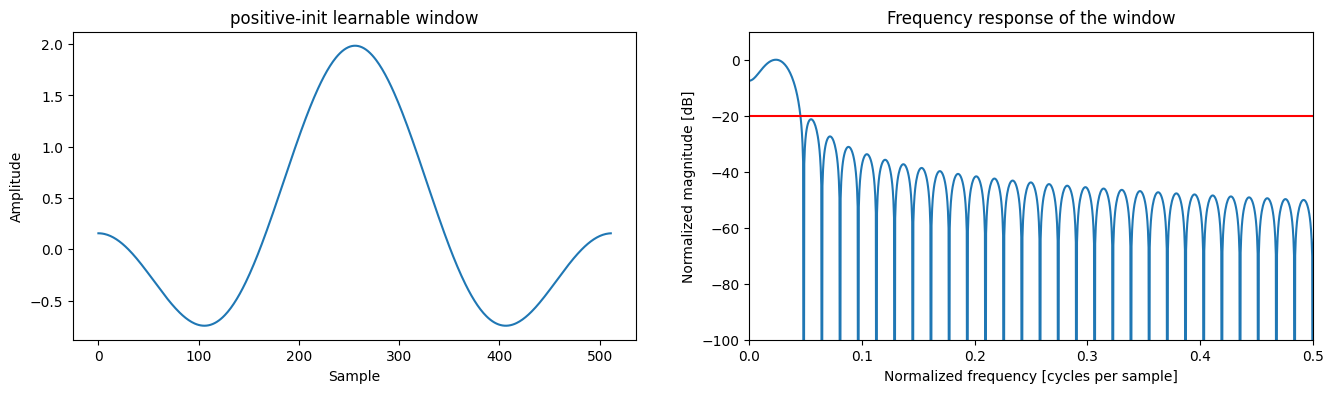

In [570]:
visualize_window(general_cosine(length, 
                        [0.2246, 0.9139, 0.8456], sym=False),
                        'positive-init learnable', f_xhighlight=-20, f_ylim=[-100,10])

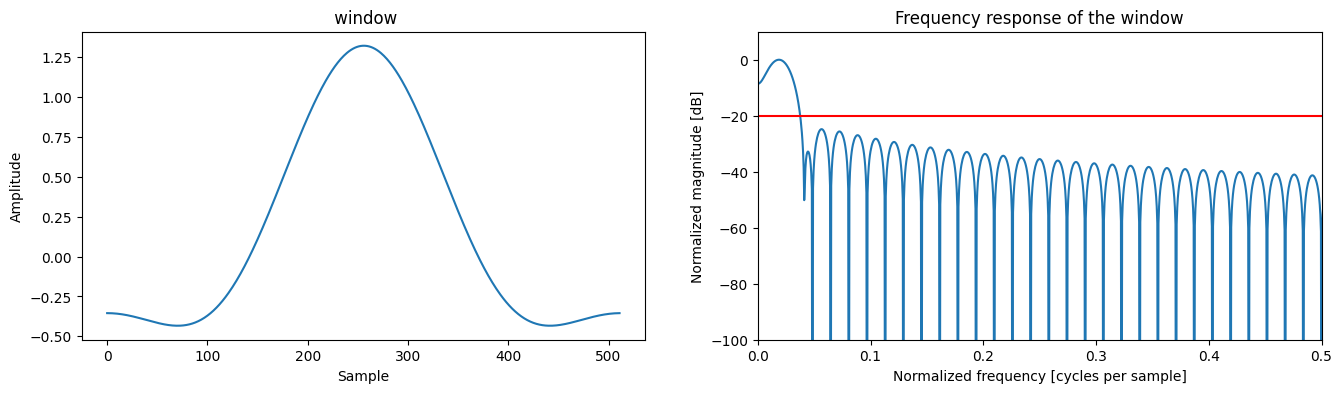

In [571]:
visualize_window(general_cosine(length, [0.1608, 0.8379, 0.3222], sym=False), 
                 f_xhighlight=-20, f_ylim=[-100,10])

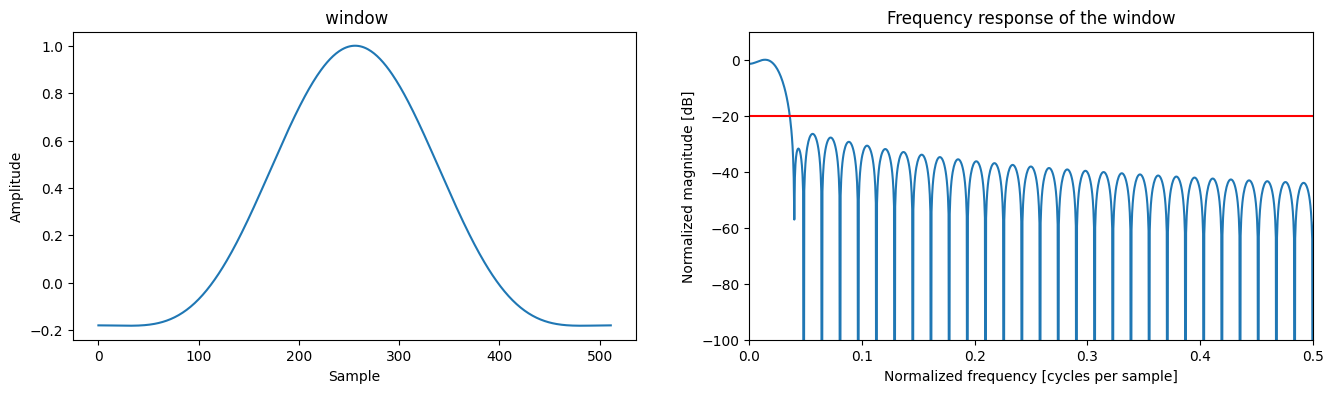

In [572]:
visualize_window(general_cosine(length, [0.2518, 0.5899, 0.1584], sym=False),
                f_xhighlight=-20, f_ylim=[-100,10])

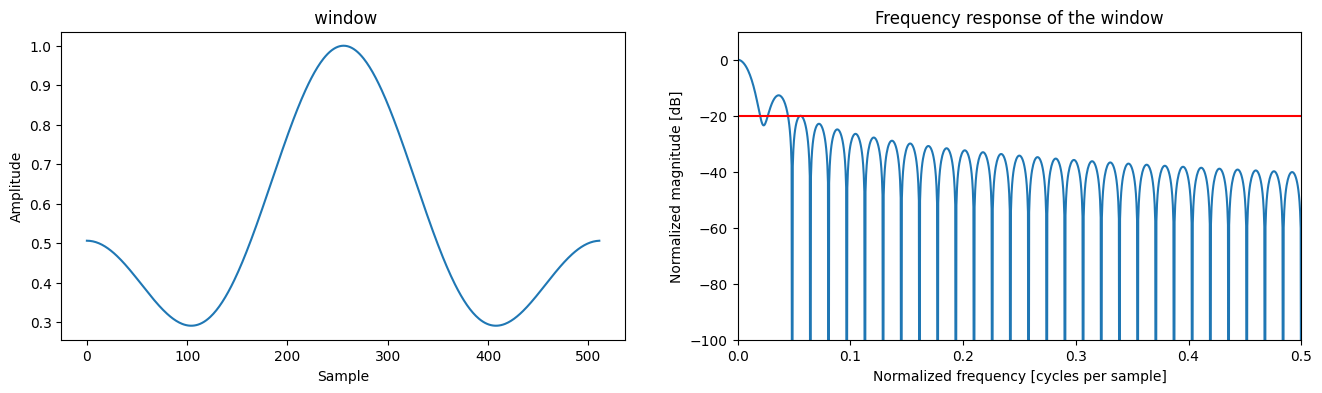

In [573]:
visualize_window(general_cosine(length, [0.5397, 0.2470, 0.2133], sym=False), 
                 f_xhighlight=-20, f_ylim=[-100,10])

In [80]:
sr=16000 # samplate
fftLength=512 # dataLength 0.128ms / 4

freArr=np.linspace(0,sr//2,fftLength//2+1)
freArr

array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
        218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
        437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
        656.25,  687.5 ,  718.75,  750.  ,  781.25,  812.5 ,  843.75,
        875.  ,  906.25,  937.5 ,  968.75, 1000.  , 1031.25, 1062.5 ,
       1093.75, 1125.  , 1156.25, 1187.5 , 1218.75, 1250.  , 1281.25,
       1312.5 , 1343.75, 1375.  , 1406.25, 1437.5 , 1468.75, 1500.  ,
       1531.25, 1562.5 , 1593.75, 1625.  , 1656.25, 1687.5 , 1718.75,
       1750.  , 1781.25, 1812.5 , 1843.75, 1875.  , 1906.25, 1937.5 ,
       1968.75, 2000.  , 2031.25, 2062.5 , 2093.75, 2125.  , 2156.25,
       2187.5 , 2218.75, 2250.  , 2281.25, 2312.5 , 2343.75, 2375.  ,
       2406.25, 2437.5 , 2468.75, 2500.  , 2531.25, 2562.5 , 2593.75,
       2625.  , 2656.25, 2687.5 , 2718.75, 2750.  , 2781.25, 2812.5 ,
       2843.75, 2875.  , 2906.25, 2937.5 , 2968.75, 3000.  , 3031.25,
       3062.5 , 3093

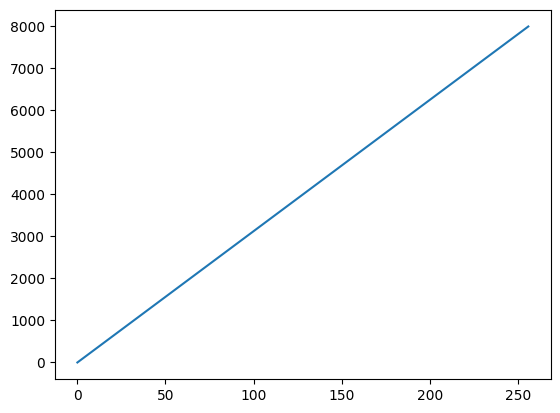

In [88]:
plt.plot(freArr)

In [ ]:
# bin can be understood as index, freArr is DFT's frequency band, bin is freArr's index.
# the first step for mel spectrogram is to calculate mel frequency band, the order is:
# hz fmin, fmax ---> mel scale fmin, fmax ---> mel scale freArr ---> hz freArr

In [84]:
mel_num=64 # mel number

# fre range
fmin=0 # index/bin=0
fmax=256 # index/bin=2049

# hz fre ---> mel scale fre
fmin_mel=2595*np.log10(1+ fmin/700);
fmax_mel=2595*np.log10(1+ fmax/700);

# mel scale freArr
freArr_scale=np.linspace(fmin_mel,fmax_mel,mel_num)

# mel scale freArr ---> mel frequency bands
freArr_mel=700*(np.power(10, freArr_scale/2595)-1)

# Why divide the Hz scale into bins?


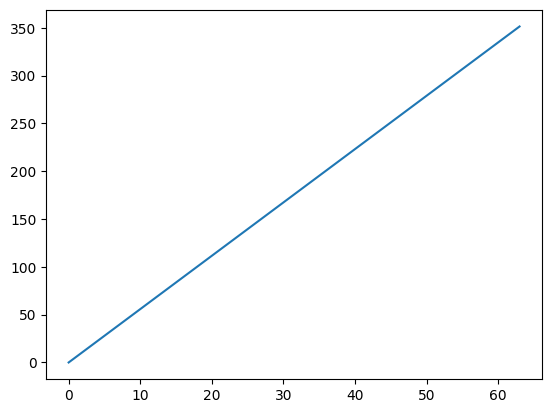

In [85]:
plt.plot(freArr_scale)

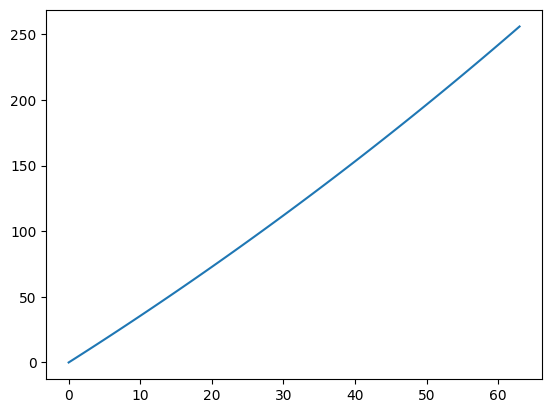

In [86]:
plt.plot(freArr_mel)

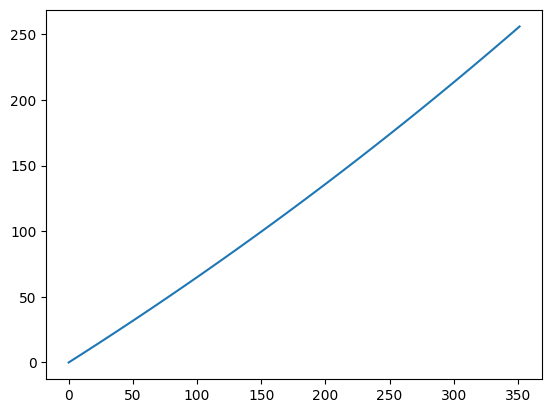

In [89]:
plt.plot(freArr_scale, freArr_mel)

In [96]:
import pandas as pd
import seaborn as sns

In [94]:
freArr_df = pd.DataFrame({'scale': freArr_scale, 'mel': freArr_mel})
freArr_df

,scale,mel
0,0.000000,0.000000
1,5.575537,3.471665
2,11.151074,6.960547
3,16.726610,10.466733
4,22.302147,13.990308
...,...,...
59,328.956670,237.267625
60,334.532206,241.916024
61,340.107743,246.587476
62,345.683280,251.282096


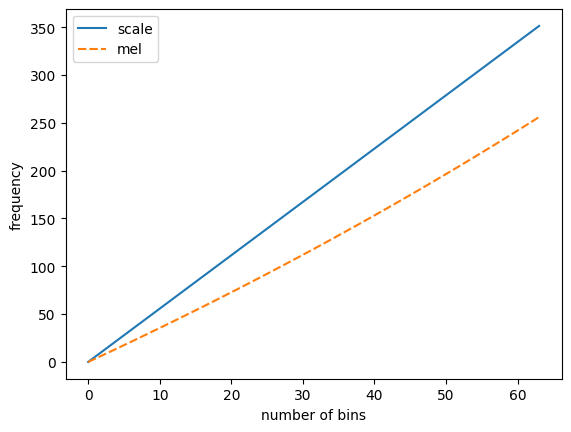

In [97]:
ax = sns.lineplot(data=freArr_df)
ax.set(xlabel='number of bins', ylabel='frequency')
plt.show()

In [99]:
import torch

In [239]:
from scipy.signal import firwin

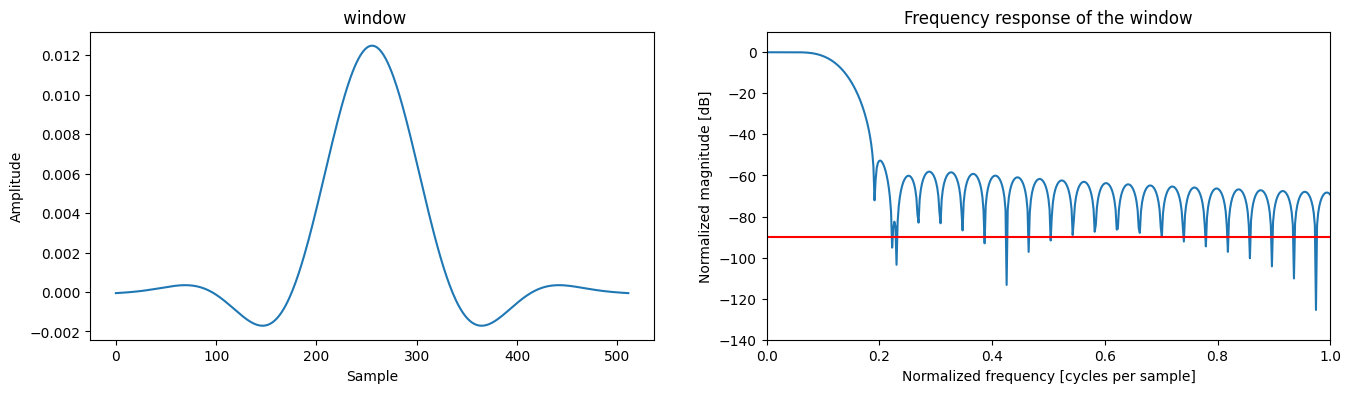

In [407]:
filter_length = 512
wwin = firwin(numtaps=filter_length, cutoff=100,width=None,window='hamming', fs=16000)
visualize_window(wwin)

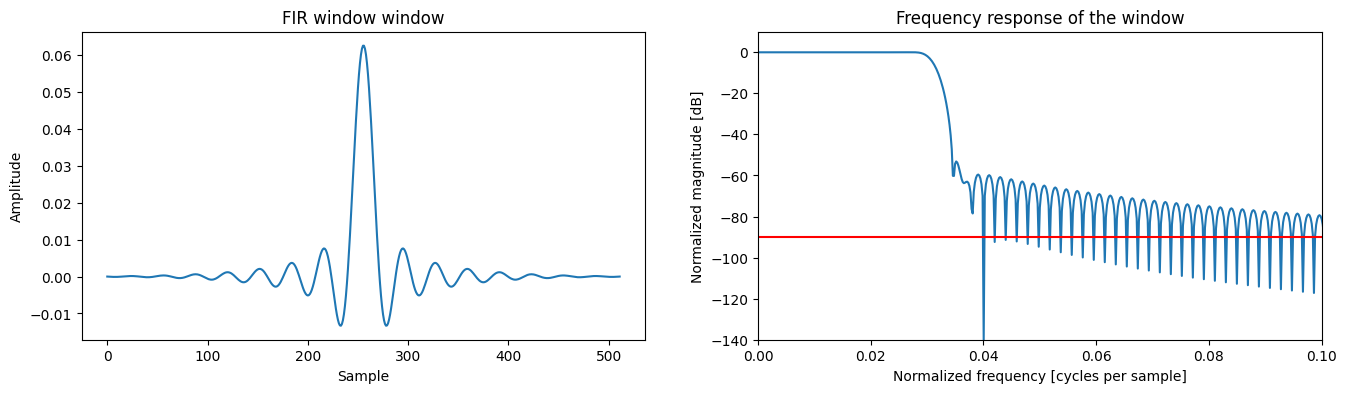

In [261]:
filter_length = 512
wwin = firwin(numtaps=filter_length, cutoff=500,width=None,window='hamming', fs=16000)
visualize_window(wwin, "FIR window", f_xlim=[0.0,0.1], f_ylim=[-140,10])

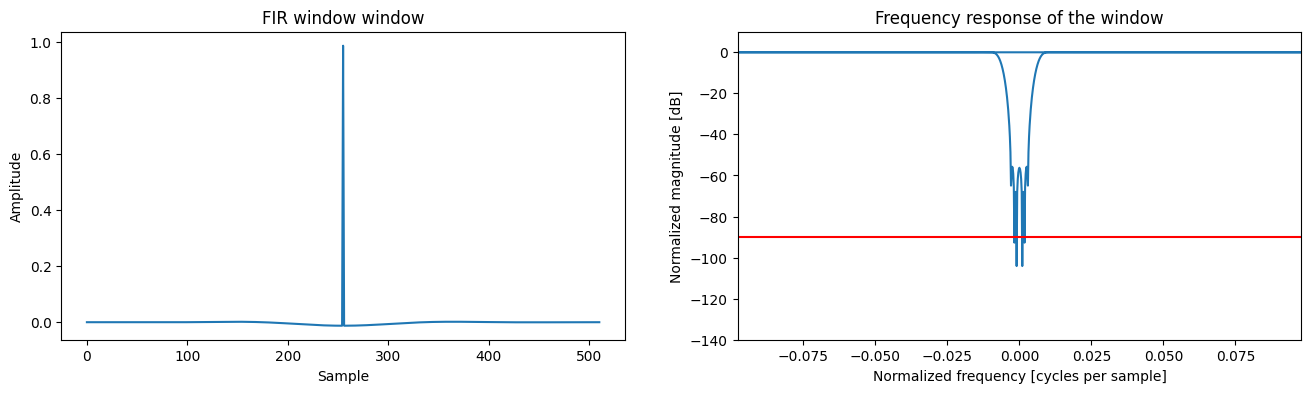

In [265]:
filter_length = 511
wwin = firwin(numtaps=filter_length, cutoff=100,width=None,window='hamming', fs=16000, pass_zero=False)
visualize_window(wwin, "FIR window")

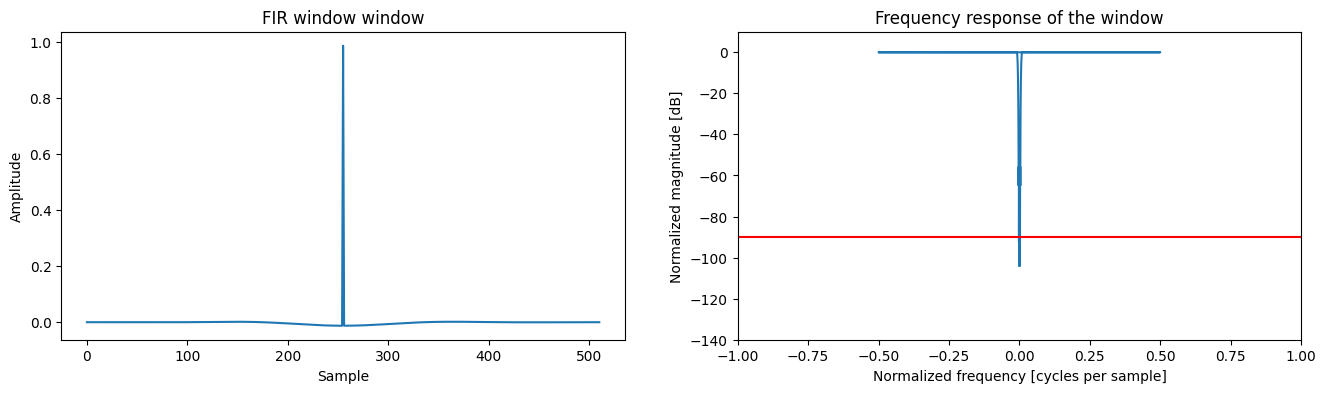

In [266]:
filter_length = 511
wwin = firwin(numtaps=filter_length, cutoff=100,width=None,window='hamming', fs=16000, pass_zero=False)
visualize_window(wwin, "FIR window", f_xlim=[-1,1])

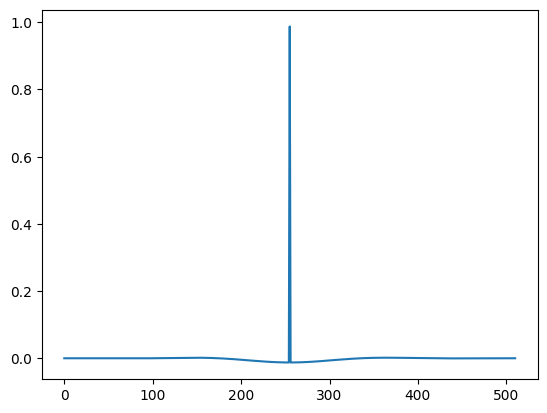

In [267]:
plt.plot(wwin)

In [ ]:
def visualize_window(window, window_name="", f_xlim=None, f_ylim=None, f_xhighlight=-90.2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    axes[0].plot(window)
    axes[0].set_title(f"{window_name} window")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_xlabel("Sample")

    length = len(window)
    A = np.fft.fft(window, length*10)/length
    freq = np.fft.fftfreq(len(A),d=1/length)/length
    response = np.abs(A / np.abs(A).max())
    response = 20 * np.log10(np.maximum(response, 1e-10)) # to dB
    if not f_xlim:
        f_xlim = [-50/length, 50/length]
    if not f_ylim:
        f_ylim = [-140, 10]
    axes[1].set_xlim(f_xlim)
    axes[1].set_ylim(f_ylim)
    axes[1].plot(freq, response)
    axes[1].set_title("Frequency response of the window")
    axes[1].set_ylabel("Normalized magnitude [dB]")
    axes[1].set_xlabel("Normalized frequency [cycles per sample]")
    axes[1].axhline(f_xhighlight, color='red')
    